In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

In [7]:
df = pd.read_csv("E:\Cornell\Fall 2020\MFE Project\sp500_features.csv")
df.head()

,gvkey,tic,conm,datadate,industry_id,trt1m,adj_ret,adj_close,cshtrm,prccm,...,ROA.1,earnings_q,earningsVol,Asset Turnover,PE,PB,PS,dividend_yield,ev_ebitda,NCFP
0,1045,AAL,AMERICAN AIRLINES GROUP INC,20150331,20,10.1879,0.101879,53.311547,395315793.0,52.780,...,0.013639,5.970000e+08,1.725000e+08,0.230265,13.129353,18.376788,3.448458,0.005627,11.923946,-0.003971
1,1045,AAL,AMERICAN AIRLINES GROUP INC,20150430,20,-8.3270,-0.085165,48.772292,235209994.0,48.285,...,0.019934,9.320000e+08,1.675000e+08,0.218975,10.295309,12.224817,3.149739,0.008201,11.760334,-0.004364
2,1045,AAL,AMERICAN AIRLINES GROUP INC,20150531,20,-12.2502,-0.122502,42.797598,256348343.0,42.370,...,0.019934,9.320000e+08,1.934123e+08,0.218975,9.034115,10.727255,2.763890,0.009346,11.138025,-0.004974
3,1045,AAL,AMERICAN AIRLINES GROUP INC,20150630,20,-5.7470,-0.057470,40.338024,300767154.0,39.935,...,0.019934,9.320000e+08,1.675000e+08,0.218975,8.514925,10.110761,2.605049,0.009916,10.881842,-0.005277
4,1045,AAL,AMERICAN AIRLINES GROUP INC,20150731,20,0.4132,0.004132,40.504689,255782039.0,40.100,...,0.035598,1.704000e+09,3.860000e+08,0.237218,6.728188,7.484021,2.568591,0.007407,10.808204,-0.005419


In [8]:
df.columns

Index(['gvkey', 'tic', 'conm', 'datadate', 'industry_id', 'trt1m', 'adj_ret',
       'adj_close', 'cshtrm', 'prccm', 'prchm', 'prclm', 'MA3', 'MA6', 'MA12',
       'EMA3', 'EMA6', 'EMA12', 'std12', 'std6', 'Size', 'PriceCap', 'ROE',
       'ROA', 'ROA.1', 'earnings_q', 'earningsVol', 'Asset Turnover', 'PE',
       'PB', 'PS', 'dividend_yield', 'ev_ebitda', 'NCFP'],
      dtype='object')

In [9]:
from datetime import datetime
df['date'] = df['datadate'].apply(lambda x: datetime(year=int(str(x)[0:4]), month=int(str(x)[4:6]), day=int(str(x)[6:8])))
df['year'] = df['date'].apply(lambda x: x.year)
df

,gvkey,tic,conm,datadate,industry_id,trt1m,adj_ret,adj_close,cshtrm,prccm,...,earningsVol,Asset Turnover,PE,PB,PS,dividend_yield,ev_ebitda,NCFP,date,year
0,1045,AAL,AMERICAN AIRLINES GROUP INC,20150331,20,10.1879,0.101879,53.311547,395315793.0,52.780,...,1.725000e+08,0.230265,13.129353,18.376788,3.448458,0.005627,11.923946,-0.003971,2015-03-31,2015
1,1045,AAL,AMERICAN AIRLINES GROUP INC,20150430,20,-8.3270,-0.085165,48.772292,235209994.0,48.285,...,1.675000e+08,0.218975,10.295309,12.224817,3.149739,0.008201,11.760334,-0.004364,2015-04-30,2015
2,1045,AAL,AMERICAN AIRLINES GROUP INC,20150531,20,-12.2502,-0.122502,42.797598,256348343.0,42.370,...,1.934123e+08,0.218975,9.034115,10.727255,2.763890,0.009346,11.138025,-0.004974,2015-05-31,2015
3,1045,AAL,AMERICAN AIRLINES GROUP INC,20150630,20,-5.7470,-0.057470,40.338024,300767154.0,39.935,...,1.675000e+08,0.218975,8.514925,10.110761,2.605049,0.009916,10.881842,-0.005277,2015-06-30,2015
4,1045,AAL,AMERICAN AIRLINES GROUP INC,20150731,20,0.4132,0.004132,40.504689,255782039.0,40.100,...,3.860000e+08,0.237218,6.728188,7.484021,2.568591,0.007407,10.808204,-0.005419,2015-07-31,2015
5,1045,AAL,AMERICAN AIRLINES GROUP INC,20150831,20,-2.5436,-0.027930,39.374400,216142585.0,38.980,...,4.457144e+08,0.237218,6.540268,7.275178,2.496850,0.010159,10.693938,-0.005575,2015-08-31,2015
6,1045,AAL,AMERICAN AIRLINES GROUP INC,20150930,20,-0.3848,-0.003848,39.222882,221627945.0,38.830,...,3.860000e+08,0.237218,6.515101,7.247183,2.487241,0.010198,10.678635,-0.005597,2015-09-30,2015
7,1045,AAL,AMERICAN AIRLINES GROUP INC,20151031,20,19.0317,0.190317,46.687654,232060056.0,46.220,...,5.500000e+06,0.228873,6.437326,7.822552,2.806712,0.006426,11.250823,-0.005011,2015-10-31,2015
8,1045,AAL,AMERICAN AIRLINES GROUP INC,20151130,20,-10.5149,-0.107313,41.678459,138098817.0,41.260,...,6.350853e+06,0.228873,5.746518,6.983258,2.505515,0.009597,10.776044,-0.005614,2015-11-30,2015
9,1045,AAL,AMERICAN AIRLINES GROUP INC,20151231,20,2.6418,0.026418,42.779514,170267514.0,42.350,...,5.500000e+06,0.228873,5.898329,7.167740,2.571706,0.009350,10.880381,-0.005469,2015-12-31,2015


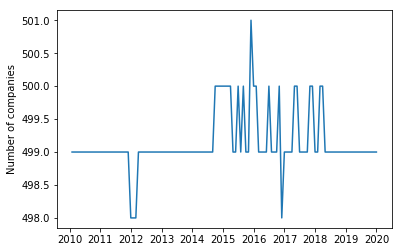

In [11]:
com_per_y = df.groupby(df['date'])['conm'].nunique()
plt.figure()
plt.plot(com_per_y)
plt.ylabel('Number of companies')
plt.show()

In [19]:
df_new = df[df.columns.difference(['gvkey', 'tic', 'conm', 'datadate', 'date'])]
df_new

,Asset Turnover,EMA12,EMA3,EMA6,MA12,MA3,MA6,NCFP,PB,PE,...,earnings_q,ev_ebitda,industry_id,prccm,prchm,prclm,std12,std6,trt1m,year
0,0.230265,9.734904,4.680056,6.756703,3.625550,-0.165567,7.367117,-0.003971,18.376788,13.129353,...,5.970000e+08,11.923946,20,52.780,56.050,46.470,10.261756,10.488511,10.1879,2015
1,0.218975,8.306484,1.420124,4.575321,3.279992,-0.113200,3.174883,-0.004364,12.224817,10.295309,...,9.320000e+08,11.760334,20,48.285,53.470,46.880,10.612339,10.967431,-8.3270,2015
2,0.218975,6.684272,-2.003892,2.146319,1.049658,-3.463100,-1.760817,-0.004974,10.727255,9.034115,...,9.320000e+08,11.138025,20,42.370,50.300,41.320,10.846595,9.918246,-12.2502,2015
3,0.218975,5.705219,-2.940990,1.008521,-0.010267,-8.774733,-4.470150,-0.005277,10.110761,8.514925,...,9.320000e+08,10.881842,20,39.935,44.380,38.450,10.836692,7.913992,-5.7470,2015
4,0.237218,5.289197,-2.101555,0.922818,0.802025,-5.861333,-2.987267,-0.005419,7.484021,6.728188,...,1.704000e+09,10.808204,20,40.100,43.810,37.800,10.432017,7.844718,0.4132,2015
5,0.237218,4.674476,-2.212154,0.424338,0.583408,-2.625800,-3.044450,-0.005575,7.275178,6.540268,...,1.704000e+09,10.693938,20,38.980,44.450,34.100,10.475924,7.839084,-2.5436,2015
6,0.237218,4.278039,-1.755044,0.308092,1.280275,-0.838400,-4.806567,-0.005597,7.247183,6.515101,...,1.704000e+09,10.678635,20,38.830,44.590,37.720,10.069055,4.911304,-0.3848,2015
7,0.228873,5.432455,3.443961,2.995875,1.464050,5.367767,-0.246783,-0.005011,7.822552,6.437326,...,1.693000e+09,11.250823,20,46.220,46.770,37.420,10.393487,10.504516,19.0317,2015
8,0.228873,4.186286,-0.046922,1.057740,-0.859192,2.710667,0.042433,-0.005614,6.983258,5.746518,...,1.693000e+09,10.776044,20,41.260,47.090,40.450,9.602025,10.124966,-10.5149,2015
9,0.228873,4.065742,0.625427,1.284841,-1.514792,3.719533,1.440567,-0.005469,7.167740,5.898329,...,1.693000e+09,10.880381,20,42.350,46.490,40.700,9.005308,9.737404,2.6418,2015


In [21]:
df_nor = df_new.groupby(['industry_id', 'year']).transform(lambda x: (x - x.mean()) / x.std())

In [28]:
df_fin = pd.concat([df[['gvkey', 'tic', 'conm', 'datadate', 'date','year','industry_id']], df_nor], axis=1)
df_fin

,gvkey,tic,conm,datadate,date,year,industry_id,Asset Turnover,EMA12,EMA3,...,dividend_yield,earningsVol,earnings_q,ev_ebitda,prccm,prchm,prclm,std12,std6,trt1m
0,1045,AAL,AMERICAN AIRLINES GROUP INC,20150331,2015-03-31,2015,20,-0.052252,6.324247,2.038301,...,-1.233544,0.049112,0.242084,-0.542382,-0.659024,-0.657789,-0.738828,2.720781,2.093430,1.606683
1,1045,AAL,AMERICAN AIRLINES GROUP INC,20150430,2015-04-30,2015,20,-0.120969,5.300898,0.619841,...,-0.964467,0.042397,0.562828,-0.594068,-0.751630,-0.709152,-0.730031,2.923970,2.305866,-1.182384
2,1045,AAL,AMERICAN AIRLINES GROUP INC,20150531,2015-05-31,2015,20,-0.120969,4.138713,-0.870014,...,-0.844782,0.077196,0.562828,-0.790659,-0.873491,-0.772261,-0.849328,3.059738,1.840476,-1.773371
3,1045,AAL,AMERICAN AIRLINES GROUP INC,20150630,2015-06-30,2015,20,-0.120969,3.437300,-1.277763,...,-0.785211,0.042397,0.562828,-0.871589,-0.923657,-0.890117,-0.910907,3.053999,0.951444,-0.793735
4,1045,AAL,AMERICAN AIRLINES GROUP INC,20150731,2015-07-31,2015,20,-0.009934,3.139253,-0.912509,...,-1.047553,0.335827,1.301975,-0.894852,-0.920258,-0.901465,-0.924854,2.819460,0.920716,0.134231
5,1045,AAL,AMERICAN AIRLINES GROUP INC,20150831,2015-08-31,2015,20,-0.009934,2.698855,-0.960633,...,-0.759842,0.416020,1.301975,-0.930949,-0.943332,-0.888724,-1.004242,2.844908,0.918217,-0.311178
6,1045,AAL,AMERICAN AIRLINES GROUP INC,20150930,2015-09-30,2015,20,-0.009934,2.414839,-0.761735,...,-0.755740,0.335827,1.301975,-0.935783,-0.946422,-0.885937,-0.926571,2.609097,-0.380466,0.014022
7,1045,AAL,AMERICAN AIRLINES GROUP INC,20151031,2015-10-31,2015,20,-0.060726,3.241887,1.500452,...,-1.150086,-0.175157,1.291444,-0.755026,-0.794173,-0.842537,-0.933007,2.797129,2.100530,2.938904
8,1045,AAL,AMERICAN AIRLINES GROUP INC,20151130,2015-11-30,2015,20,-0.060726,2.349106,-0.018499,...,-0.818548,-0.174015,1.291444,-0.905011,-0.896359,-0.836166,-0.867995,2.338420,1.932171,-1.511967
9,1045,AAL,AMERICAN AIRLINES GROUP INC,20151231,2015-12-31,2015,20,-0.060726,2.262746,0.274054,...,-0.844369,-0.175157,1.291444,-0.872051,-0.873903,-0.848111,-0.862631,1.992579,1.760260,0.469946


In [29]:
df_fin.columns

Index(['gvkey', 'tic', 'conm', 'datadate', 'date', 'year', 'industry_id',
       'Asset Turnover', 'EMA12', 'EMA3', 'EMA6', 'MA12', 'MA3', 'MA6', 'NCFP',
       'PB', 'PE', 'PS', 'PriceCap', 'ROA', 'ROA.1', 'ROE', 'Size',
       'adj_close', 'adj_ret', 'cshtrm', 'dividend_yield', 'earningsVol',
       'earnings_q', 'ev_ebitda', 'prccm', 'prchm', 'prclm', 'std12', 'std6',
       'trt1m'],
      dtype='object')